In [4]:
##############################################################
# My goal is to entice you with some cool examples.          #
#  I'm assuming you have python installed                    #
# Install Anaconda if you are new to python and are          #
# interested in data science.                                #
# After discussion, just ask me to help you install this stuff #
# http://conda.pydata.org/docs/download.html                   #
################################################################

# If you never look at python code again, at least you can see some fun stuff.

#  To install pip, securely download get-pip.py
# https://pip.pypa.io/en/stable/installing/
# then from the terminal, run the command
# python get-pip.py
# this will run the python script that installs the pip python package manager

# Now, installing packages is as easy as the following commands
# pip install numpy
# pip install scipy
# pip install cython
# pip install pylab

# or 

# pip install numpy scipy cython pylab timeit numba matplotlib


%matplotlib inline  

import numpy as np


In [5]:
%load_ext Cython


The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [13]:
%%cython -a
# with %%cython -a , full C-speed lines are shown in white, slowest python-speed lines are shown in dark yellow lines 
# ==> put your cython rewrite effort on dark yellow lines
def mandel_cython(x, y, max_iters):
  cdef int   i 
  cdef double   cx, cy , zx, zy
  cx , cy = x, y 
  zx , zy =0 ,0 
  for i in range(max_iters):
    zx , zy = zx*zx - zy*zy + cx , zx*zy*2 + cy
    if (zx*zx + zy*zy) >= 4:
      return i
  return max_iters

Mandelbrot created by numba in 0.884340 s


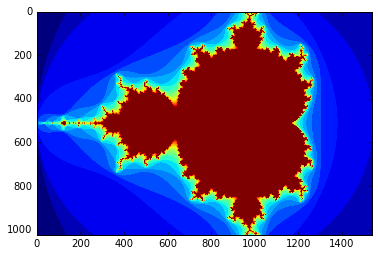

In [10]:
import numpy as np
image = np.zeros((1024, 1536), dtype = np.uint8)

from pylab import imshow, show
from timeit import default_timer as timer
from numba import autojit


@autojit
def mandel(x, y, max_iters):
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i
  return max_iters

def create_fractal(min_x, max_x, min_y, max_y, image, iters , mandelx):
  height = image.shape[0]
  width = image.shape[1]
  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = mandelx(real, imag, iters)
      image[y, x] = color
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20 , mandel) 
dt = timer() - start

print ("Mandelbrot created by numba in %f s" % dt)
imshow(image)
show()





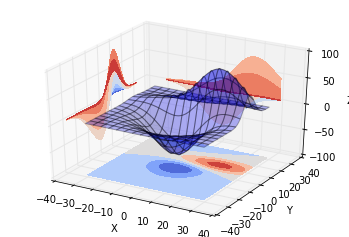

In [11]:
# Matplotlib
# Check out http://matplotlib.org/gallery.html
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()  # example of 3d plots

Mandelbrot created by cython in 0.561543 s


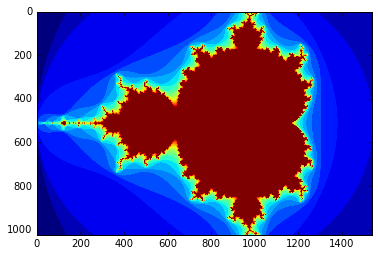

In [12]:

start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20 , mandel_cython) 
dt = timer() - start

print ("Mandelbrot created by cython in %f s" % dt)
imshow(image)
show()


In [17]:
# On an iphone, your voice mail is stored in the AMR-NB format
# Check this link out, it's epic.

# https://prezi.com/htjjanc_fn7q/mp3-wav-and-amr-audio-file-formats/

#  Adaptive multi rate audio format
# (.amr file) (160 samples for 20 ms frames)
# Sampling frequency 8 kHz/13-bit
# filtered to 200-3400 Hz
# First convert to .wav file
# http://www.convertfiles.com/downloadpage.php?subdir=0465426001460493940/&ID=90072757

# pip install wave

# in this example I assume you have an audio fule names voicemail.wav in the current directory

import wave

f = wave.open("voicemail.wav", 'r')  # Now we have our first audio file

f.getnchannels()

1

In [21]:
f.getframerate() # sampling frequency


8000

In [22]:
f.getcomptype()  # Notice it is not compressed

'NONE'

In [23]:
f.getparams() # all at once

(1, 2, 8000, 1440000, 'NONE', 'not compressed')

In [20]:
f.getnframes()

1440000

In [37]:
import IPython
# Generate a sound
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
IPython.lib.display.Audio(data,rate=framerate)






In [38]:
# Can also do stereo or more channels
dataleft = np.sin(2*np.pi*220*t)
dataright = np.sin(2*np.pi*224*t)
IPython.lib.display.Audio([dataleft, dataright],rate=framerate)


In [ ]:
# Audio("http://www.nch.com.au/acm/8k16bitpcm.wav")  # From URL
# Audio(url="http://www.w3schools.com/html/horse.ogg")

# Audio(filename='voicemail.wav') # From file